# Machine Learning

---

## Simbench Data [Code](https://github.com/FlorianShepherd/pandapower-youtube/blob/master/scripts/machine_learning_tutorial/0_simbench_ts.py) | [Documentation](https://github.com/e2nIEE/simbench/blob/master/tutorials/simbench_grids_basics_and_usage.ipynb)

<a href="http://www.youtube.com/watch?feature=player_embedded&v=kHbAMoCv-d4" target="_blank">
    <img 
        src="http://img.youtube.com/vi/kHbAMoCv-d4/0.jpg" 
        alt="Easy plotting Youtube Video" width="240" height="180" border="10" 
    />
</a>

In [2]:
import simbench as sb

grid_code = "1-HV-urban--0-sw"
net = sb.get_simbench_net(grid_code)
profiles = sb.get_absolute_values(net, profiles_instead_of_study_cases=True)

print(profiles.keys())

c:\Users\junai\Documents\Workspaces\Jupyter_Notebook\pandapower-youtube\venv\lib\site-packages\simbench\converter\csv_pp_converter.py:390: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  idx_bus = data["Measurement"].index.difference(idx_line | idx_trafo).astype(int)
c:\Users\junai\Documents\Workspaces\Jupyter_Notebook\pandapower-youtube\venv\lib\site-packages\simbench\converter\csv_pp_converter.py:468: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  missing = csv_data["Line"].index.difference(idx_lines | idx_dclines)
c:\Users\junai\Documents\Workspaces\Jupyter_Notebook\pandapower-youtube\venv\lib\site-packages\simbench\converter\csv_pp_converter.py:472: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the

dict_keys([('load', 'p_mw'), ('load', 'q_mvar'), ('sgen', 'p_mw'), ('gen', 'p_mw'), ('storage', 'p_mw')])


In [3]:
print(net)

This pandapower network includes the following parameter tables:
   - bus (372 elements)
   - load (79 elements)
   - sgen (98 elements)
   - switch (498 elements)
   - ext_grid (1 element)
   - line (113 elements)
   - trafo (3 elements)
   - measurement (1122 elements)
   - bus_geodata (372 elements)
   - substation (14 elements)
   - loadcases (6 elements)


In [7]:
# To start time series calculations, we need profiles
load_p = profiles[("load", "p_mw")]
load_q = profiles[("load", "q_mvar")]
sgen_p = profiles[("sgen", "p_mw")]

# columns are element indices and rows are timestamps
print(load_p)

             0         1         2         3         4         5         6   \
0      0.166817  0.166817  0.166817  0.166817  0.166817  0.166817  0.166817   
1      0.151334  0.151334  0.151334  0.151334  0.151334  0.151334  0.151334   
2      0.138827  0.138827  0.138827  0.138827  0.138827  0.138827  0.138827   
3      0.122876  0.122876  0.122876  0.122876  0.122876  0.122876  0.122876   
4      0.137754  0.137754  0.137754  0.137754  0.137754  0.137754  0.137754   
...         ...       ...       ...       ...       ...       ...       ...   
35131  0.136995  0.136995  0.136995  0.136995  0.136995  0.136995  0.136995   
35132  0.121983  0.121983  0.121983  0.121983  0.121983  0.121983  0.121983   
35133  0.101357  0.101357  0.101357  0.101357  0.101357  0.101357  0.101357   
35134  0.128687  0.128687  0.128687  0.128687  0.128687  0.128687  0.128687   
35135  0.116609  0.116609  0.116609  0.116609  0.116609  0.116609  0.116609   

             7         8         9   ...        69 

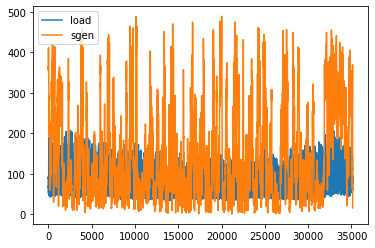

In [9]:
import matplotlib.pyplot as plt
load_p.sum(axis=1).plot(label="load")
sgen_p.sum(axis=1).plot(label="sgen")
plt.legend()
plt.show()

In [12]:
# timeseries calculation
import pandapower.timeseries as ts
from pandapower.control.controller.const_control import ConstControl
from pandapower.timeseries.data_sources.frame_data import DFData

ds = DFData(sgen_p)
ConstControl(net, "sgen", "p_mw", element_index=net.sgen.index, profile_name=sgen_p.columns, data_source=ds)

ds = DFData(load_p)
ConstControl(net, "load", "p_mw", element_index=net.load.index, profile_name=load_p.columns, data_source=ds)

ds = DFData(load_q)
ConstControl(net, "load", "q_mvar", element_index=net.load.index, profile_name=load_q.columns, data_source=ds)

ts.OutputWriter(net, output_path="./machine_learning_data", output_file_type=".json")
ts.run_time_series.run_timeseries(net)

No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
recycle is set to True, but internal variables are missing


Progress: |██████████████████████████████████████████████████| 100.0% Complete



---

## Data Preprocessing [Code](https://github.com/FlorianShepherd/pandapower-youtube/blob/master/scripts/machine_learning_tutorial/1_ann_data.py) | [Documentation]()

<a href="http://www.youtube.com/watch?feature=player_embedded&v=RBY03lV_gE4" target="_blank">
    <img 
        src="http://img.youtube.com/vi/RBY03lV_gE4/0.jpg" 
        alt="Easy plotting Youtube Video" width="240" height="180" border="10" 
    />
</a>

In [1]:
import simbench as sb

grid_code = "1-HV-urban--0-sw"
net = sb.get_simbench_net(grid_code)
profiles = sb.get_absolute_values(net, profiles_instead_of_study_cases=True)

sgen_p = profiles[("sgen", "p_mw")]
load_p = profiles[("load", "p_mw")]
load_q = profiles[("load", "q_mvar")]

c:\Users\junai\Documents\Workspaces\Jupyter_Notebook\pandapower-youtube\venv\lib\site-packages\simbench\converter\csv_pp_converter.py:390: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  idx_bus = data["Measurement"].index.difference(idx_line | idx_trafo).astype(int)
c:\Users\junai\Documents\Workspaces\Jupyter_Notebook\pandapower-youtube\venv\lib\site-packages\simbench\converter\csv_pp_converter.py:468: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  missing = csv_data["Line"].index.difference(idx_lines | idx_dclines)
c:\Users\junai\Documents\Workspaces\Jupyter_Notebook\pandapower-youtube\venv\lib\site-packages\simbench\converter\csv_pp_converter.py:472: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the

In [2]:
import pandas as pd
X = pd.concat([sgen_p, load_p, load_q], axis=1)
y = pd.read_json("./machine_learning_data/res_line/loading_percent.json")

In [3]:
# Randomly split data for training and testing from the available test data
from sklearn.model_selection import train_test_split
# Use 10 percent of X and y for training
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1)

In [4]:
# Scale data because neural network can learn better from scaled data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Save splitted and scaled data using numpy
import numpy as np
np.save("./machine_learning_data/X_train.npy", X_train)
np.save("./machine_learning_data/X_test.npy", X_test)
np.save("./machine_learning_data/y_train.npy", y_train)
np.save("./machine_learning_data/y_test.npy", y_test)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(35136, 256)
(3513, 256)
(31623, 256)


---

## Training and Prediction [Code](https://github.com/FlorianShepherd/pandapower-youtube/blob/master/scripts/machine_learning_tutorial/2_ann_prediction.py) | [Documentation]()

<a href="http://www.youtube.com/watch?feature=player_embedded&v=OSnW_AE1nFY" target="_blank">
    <img 
        src="http://img.youtube.com/vi/OSnW_AE1nFY/0.jpg" 
        alt="Easy plotting Youtube Video" width="240" height="180" border="10" 
    />
</a>

In [6]:
import numpy as np
# sgen_p, load_p, load_q
X_train = np.load("machine_learning_data/X_train.npy")
X_test = np.load("machine_learning_data/X_test.npy")
# line loading results
y_train = np.load("machine_learning_data/y_train.npy")
y_test = np.load("machine_learning_data/y_test.npy")

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
# x is already scaled

In [25]:
# MLPRegressor supports multi-output
from sklearn.neural_network import MLPRegressor
ann = MLPRegressor(verbose=1)
# 10 percent of powerflow data
ann.fit(X_train, y_train)
# 90 percent of powerflow data
y_predict = ann.predict(X_test)
# predicted output is scaled, so we have to inverse transform it to compare it with actual results
y_predict = scaler.inverse_transform(y_predict)

Iteration 1, loss = 0.42500399
Iteration 2, loss = 0.17533651
Iteration 3, loss = 0.10470102
Iteration 4, loss = 0.08294977
Iteration 5, loss = 0.07037844
Iteration 6, loss = 0.06154290
Iteration 7, loss = 0.05493633
Iteration 8, loss = 0.04970883
Iteration 9, loss = 0.04477991
Iteration 10, loss = 0.04154792
Iteration 11, loss = 0.03767242
Iteration 12, loss = 0.03417601
Iteration 13, loss = 0.03167090
Iteration 14, loss = 0.02902370
Iteration 15, loss = 0.02644142
Iteration 16, loss = 0.02464046
Iteration 17, loss = 0.02249345
Iteration 18, loss = 0.02128033
Iteration 19, loss = 0.02002222
Iteration 20, loss = 0.01866333
Iteration 21, loss = 0.01729219
Iteration 22, loss = 0.01691609
Iteration 23, loss = 0.01565880
Iteration 24, loss = 0.01499785
Iteration 25, loss = 0.01464798
Iteration 26, loss = 0.01377329
Iteration 27, loss = 0.01311675
Iteration 28, loss = 0.01318193
Iteration 29, loss = 0.01220556
Iteration 30, loss = 0.01188523
Iteration 31, loss = 0.01185361
Iteration 32, los

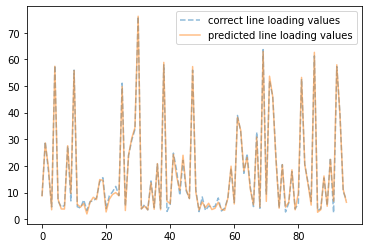

In [26]:
import matplotlib.pyplot as plt
# we look at first 96 timestamps for line 53
# line 53 because, we cheated and looked up the line with highest loading
# plt.plot(y_test[:96, 53], alpha=.5, linestyle="--", label="correct line loading values")
# plt.plot(y_predict[:96, 53], alpha=.5, linestyle="-", label="predicted line loading values")
plt.plot(y_test[:96, 53], alpha=.5, linestyle="--", label="correct line loading values")
plt.plot(y_predict[:96, 53], alpha=.5, linestyle="-", label="predicted line loading values")
plt.legend()
plt.show()

In [27]:
# Quantify error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)
print(f"the error is only {mse:.2f}%")

the error is only 0.09%


In [28]:
# Check prediction time for nearly 35000 timestamps
from time import time
t0 = time()
y_predict = ann.predict(X_test)
t1 = time() - t0
print(f"ANN time: {t1:.2f}")

ANN time: 0.24


> It was a very simple example because we didn't optimize hyper-parameters. We just trained on the load, sgen values and line loading predictions. This can ofcourse be further optimized but this is nice little example to demonstrate how **Python** and **pandapower** work great together.

---